## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_counts_before = mouse_data["Mouse ID"].nunique()
mouse_counts_before

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_dupes = mouse_data[mouse_data.duplicated(['Mouse ID', 'Timepoint'])]
mouse_dupes_ID = mouse_dupes.iloc[0, 0]
mouse_dupes_ID

'g989'

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_dupes_all = mouse_data[mouse_data['Mouse ID'] == mouse_dupes_ID]
mouse_dupes_all

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data.drop(mouse_data[mouse_data['Mouse ID'] == mouse_dupes_ID].index, inplace = True)
mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_counts_after = mouse_data["Mouse ID"].nunique()
mouse_counts_after

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen = mouse_data["Drug Regimen"]

regimen = regimen.drop_duplicates()
drug_name = []
regimen_tumorvol_mean = []
regimen_tumorvol_median = []
regimen_tumorvol_var = []
regimen_tumorvol_std = []
regimen_tumorvol_sem = []

for drug in regimen:
    drug_name.append(drug)
    regimen_tumorvol = mouse_data.loc[mouse_data['Drug Regimen']==drug, 'Tumor Volume (mm3)']
    regimen_tumorvol_mean.append(regimen_tumorvol.mean())
    regimen_tumorvol_median.append(regimen_tumorvol.median())
    regimen_tumorvol_var.append(regimen_tumorvol.var())
    regimen_tumorvol_std.append(regimen_tumorvol.std())
    regimen_tumorvol_sem.append(regimen_tumorvol.sem())
    

statistics_dict = {'Drug Regimen': drug_name,
    'Mean':regimen_tumorvol_mean,
     'Median':regimen_tumorvol_median, 
     'Variance': regimen_tumorvol_var, 
     'Standard Deviation': regimen_tumorvol_std,
     'SEM': regimen_tumorvol_sem}

statistics_df = pd.DataFrame(statistics_dict)
statistics_df = statistics_df.sort_values('Drug Regimen')
statistics_df = statistics_df.set_index('Drug Regimen')

statistics_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
drug_group = mouse_data.groupby(["Drug Regimen"])
drug_group_tumorvol = drug_group["Tumor Volume (mm3)"]
drug_group_describe = drug_group_tumorvol.describe()
drug_group_describe["Variance"] = drug_group_tumorvol.var()
drug_group_describe["SEM"] = drug_group_tumorvol.sem()
drug_group_describe = drug_group_describe.rename(columns={"mean":"Mean", "50%":"Median", "std": "Standard Deviation"})

statistics_groupby = drug_group_describe.loc[:, ["Mean", "Median", "Variance", "Standard Deviation", "SEM"]]

statistics_groupby


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

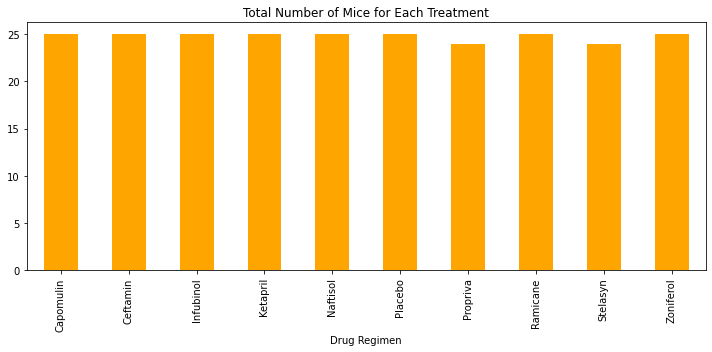

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
treatment_group = mouse_data.groupby(["Drug Regimen"])
unique_mouseIDs = treatment_group["Mouse ID"].nunique()

unique_mouseIDs.plot(kind="bar", title="Total Number of Mice for Each Treatment",
                     color="orange", figsize=(10,5))

#plt.title("Total Number of Mice for Each Treatment")
#plt.ylabel("Number of Mice")
plt.tight_layout()

Text(0.5, 1.0, 'Total Number of Mice for Each Treatment')

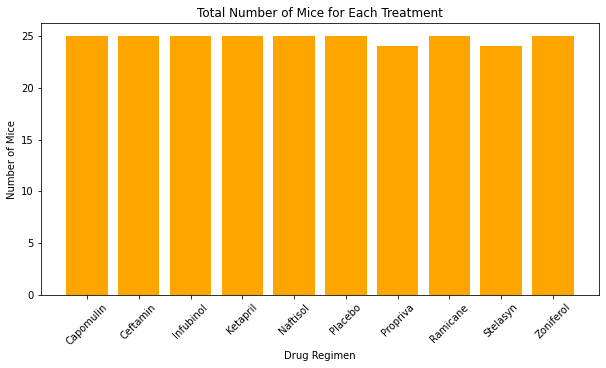

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(unique_mouseIDs))
x_axis

plt.figure(figsize=(10,5))
plt.bar(x_axis, unique_mouseIDs, color='orange', align="center")
plt.xticks(x_axis, unique_mouseIDs.index, rotation=45)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Total Number of Mice for Each Treatment")


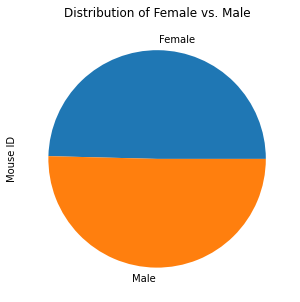

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_group = mouse_data.groupby(["Sex"])
unique_sex_counts = sex_group["Mouse ID"].nunique()

unique_sex_counts.plot(kind="pie", title="Distribution of Female vs. Male",
                       figsize=(10,5))

Text(0.5, 1.0, 'Distribution of Female vs. Male')

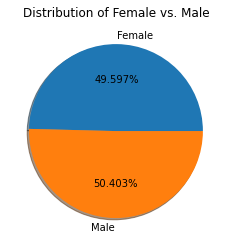

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(unique_sex_counts, labels=unique_sex_counts.index, autopct="%1.3f%%", shadow=True)
plt.title("Distribution of Female vs. Male")

## Quartiles, Outliers and Boxplots

In [43]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
mouse_data
regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
regimen.sort()
print(f"Drug Regimen: {regimen}")

selected_regimen = mouse_data.loc[(mouse_data['Drug Regimen']=="Capomulin") | (mouse_data['Drug Regimen']=="Ramicane") |
                                 (mouse_data['Drug Regimen']=="Infubinol") | (mouse_data['Drug Regimen']=="Ceftamin")]


selected_regimen = selected_regimen.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"])
selected_regimen = selected_regimen.reset_index()
#mouseIDs = selected_regimen["Mouse ID"]
#mouseIDs = mouseIDs.drop_duplicates()
#mouseIDs

mouseID_list = []

mouse_last_timepoint = []

selected_regimen_length = len(selected_regimen) 

for drug in regimen:
    print("In the drug for loop: {drug}")
    for i in range(selected_regimen_length):
        print(f"In the index: {i} loop")
        if selected_regimen.loc[i, 'Drug Regimen'] == drug:
            print('Drugs are the same')
            if i+1 < selected_regimen_length:
                if selected_regimen.loc[i, "Mouse ID"] == selected_regimen.loc[i+1, "Mouse ID"]:
                    print("Mouse IDs are the same")
                    if selected_regimen.loc[i, "Timepoint"] < selected_regimen.loc[i+1, "Timepoint"]:
                        print("Timepoint is less than next value")
                        drug_name = drug
                        mouse_name = selected_regimen.loc[i+1, "Mouse ID"]
                        last_timepoint = selected_regimen.loc[i+1, "Timepoint"]
                        last_tumor_vol = selected_regimen.loc[i+1, "Tumor Volume (mm3)"]
                        print(mouse_name)
                        print(last_timepoint)
                        print(last_tumor_vol)
                else:
                    mouse_last_timepoint.append({"Drug Regimen": drug_name, "Mouse ID": mouse_name, "Last Timepoint" : last_timepoint, "Last Tumor Volume": last_tumor_vol})

                    
mouse_last_timepoint.append({"Drug Regimen": drug_name, "Mouse ID": mouse_name, "Last Timepoint" : last_timepoint, "Last Tumor Volume": last_tumor_vol})
print(mouse_last_timepoint)
print(len(mouse_last_timepoint))


# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


Drug Regimen: ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']
In the drug for loop: {drug}
In the index: 0 loop
Drugs are the same
Mouse IDs are the same
Timepoint is less than next value
b128
5
45.65133131
In the index: 1 loop
Drugs are the same
Mouse IDs are the same
Timepoint is less than next value
b128
10
43.2708519
In the index: 2 loop
Drugs are the same
Mouse IDs are the same
Timepoint is less than next value
b128
15
43.78489343
In the index: 3 loop
Drugs are the same
Mouse IDs are the same
Timepoint is less than next value
b128
20
42.731552
In the index: 4 loop
Drugs are the same
Mouse IDs are the same
Timepoint is less than next value
b128
25
43.26214483
In the index: 5 loop
Drugs are the same
Mouse IDs are the same
Timepoint is less than next value
b128
30
40.60533486
In the index: 6 loop
Drugs are the same
Mouse IDs are the same
Timepoint is less than next value
b128
35
37.96764437
In the index: 7 loop
Drugs are the same
Mouse IDs are the same
Timepoint is less than next 

In the index: 262 loop
Drugs are the same
Mouse IDs are the same
Timepoint is less than next value
j296
15
50.70127959
In the index: 263 loop
Drugs are the same
Mouse IDs are the same
Timepoint is less than next value
j296
20
54.00534209
In the index: 264 loop
Drugs are the same
Mouse IDs are the same
Timepoint is less than next value
j296
25
55.76714817
In the index: 265 loop
Drugs are the same
Mouse IDs are the same
Timepoint is less than next value
j296
30
56.80306121
In the index: 266 loop
Drugs are the same
Mouse IDs are the same
Timepoint is less than next value
j296
35
58.71448296
In the index: 267 loop
Drugs are the same
Mouse IDs are the same
Timepoint is less than next value
j296
40
60.07268848
In the index: 268 loop
Drugs are the same
Mouse IDs are the same
Timepoint is less than next value
j296
45
61.84902336
In the index: 269 loop
Drugs are the same
In the index: 270 loop
Drugs are the same
Mouse IDs are the same
Timepoint is less than next value
k210
5
47.91899771
In the 

In the index: 450 loop
Drugs are the same
Mouse IDs are the same
Timepoint is less than next value
c139
30
64.14987077
In the index: 451 loop
Drugs are the same
Mouse IDs are the same
Timepoint is less than next value
c139
35
67.82141969
In the index: 452 loop
Drugs are the same
Mouse IDs are the same
Timepoint is less than next value
c139
40
69.42814095
In the index: 453 loop
Drugs are the same
Mouse IDs are the same
Timepoint is less than next value
c139
45
72.2267309
In the index: 454 loop
Drugs are the same
In the index: 455 loop
Drugs are the same
Mouse IDs are the same
Timepoint is less than next value
c326
5
36.321345799999996
In the index: 456 loop
Drugs are the same
In the index: 457 loop
Drugs are the same
Mouse IDs are the same
Timepoint is less than next value
c895
5
45.47754399
In the index: 458 loop
Drugs are the same
Mouse IDs are the same
Timepoint is less than next value
c895
10
49.77901542
In the index: 459 loop
Drugs are the same
Mouse IDs are the same
Timepoint is l

Timepoint is less than next value
k403
10
35.01427146
In the index: 715 loop
Drugs are the same
Mouse IDs are the same
Timepoint is less than next value
k403
15
34.22399174
In the index: 716 loop
Drugs are the same
Mouse IDs are the same
Timepoint is less than next value
k403
20
32.99772858
In the index: 717 loop
Drugs are the same
Mouse IDs are the same
Timepoint is less than next value
k403
25
33.46457735
In the index: 718 loop
Drugs are the same
Mouse IDs are the same
Timepoint is less than next value
k403
30
31.09949753
In the index: 719 loop
Drugs are the same
Mouse IDs are the same
Timepoint is less than next value
k403
35
26.54699343
In the index: 720 loop
Drugs are the same
Mouse IDs are the same
Timepoint is less than next value
k403
40
24.36550471
In the index: 721 loop
Drugs are the same
Mouse IDs are the same
Timepoint is less than next value
k403
45
22.05012627
In the index: 722 loop
Drugs are the same
In the index: 723 loop
Drugs are the same
Mouse IDs are the same
Timepo

In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
